In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [50]:
df = pd.read_csv('AirBNB.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2440\436833659.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AirBNB.csv')


In [52]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [54]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [56]:
df.drop('id',axis=1,inplace = True)

In [58]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [196]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [198]:
num

['room_type',
 'accommodates',
 'bathrooms',
 'cancellation_policy',
 'cleaning_fee',
 'instant_bookable',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [200]:
cat

[]

In [68]:
Data_Summary = round(df[num].describe().T,2)

In [70]:
Data_Summary['CoV'] = round(Data_Summary['std'] * 100/Data_Summary['mean'],2)

In [72]:
Data_Summary['Med-to-meam'] = round(Data_Summary['50%']/Data_Summary['mean'],2)

In [74]:
Data_Summary

,count,mean,std,min,25%,50%,75%,max,CoV,Med-to-meam
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0,68.04,0.63
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0,46.77,0.81
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0,8.33,1.02
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0,66.93,0.79
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0,73.10,0.58
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6,15.06,0.99


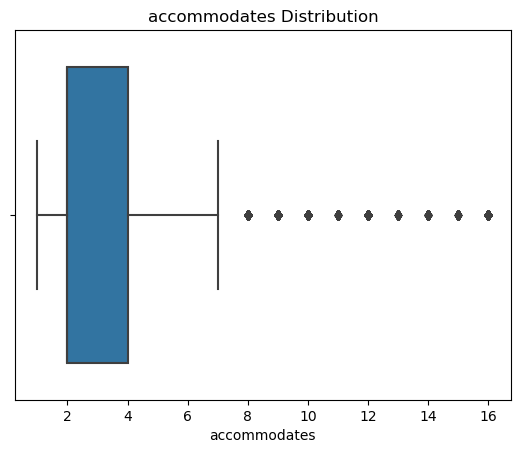

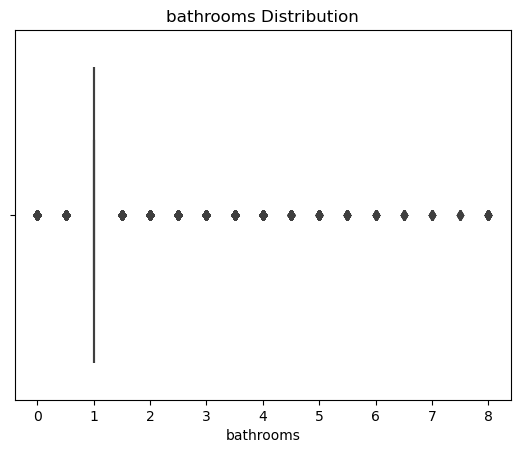

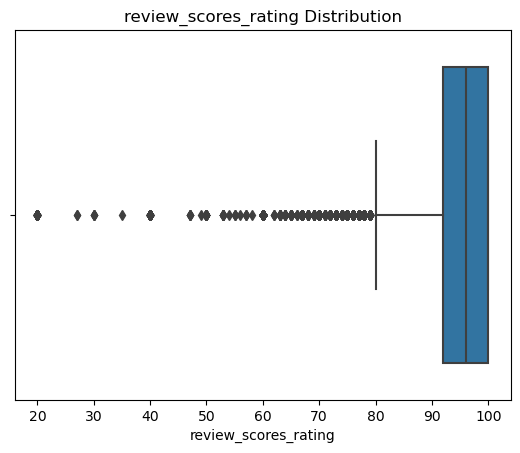

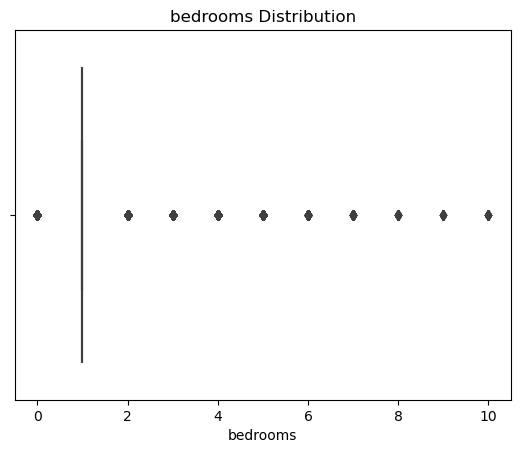

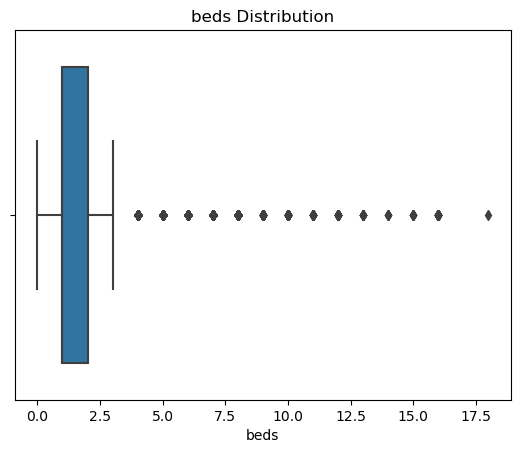

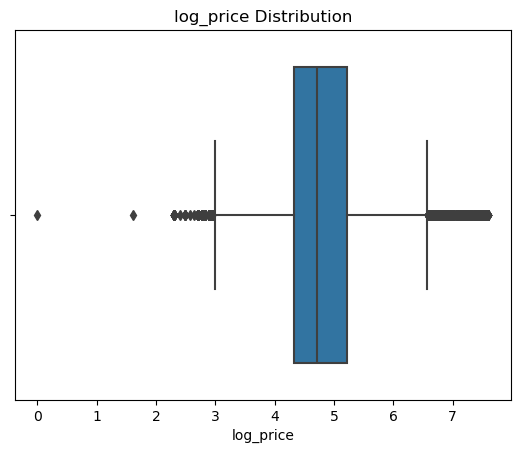

In [15]:
for i in num:
    ax = sns.boxplot(data = df[num],x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{}'.format(i))
    plt.show()

In [16]:
for i in cat:
    print(df[i].value_counts(normalize = True))
    print()

room_type
Entire home/apt    0.557418
Private room       0.413394
Shared room        0.029188
Name: proportion, dtype: float64

cancellation_policy
strict      0.438579
flexible    0.304212
moderate    0.257210
Name: proportion, dtype: float64

cleaning_fee
True     0.73406
False    0.26594
Name: proportion, dtype: float64

instant_bookable
f    0.737542
t    0.262458
Name: proportion, dtype: float64



In [17]:
sns.pairplot(df[num],hue = 'log_price')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023C97DAA0C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

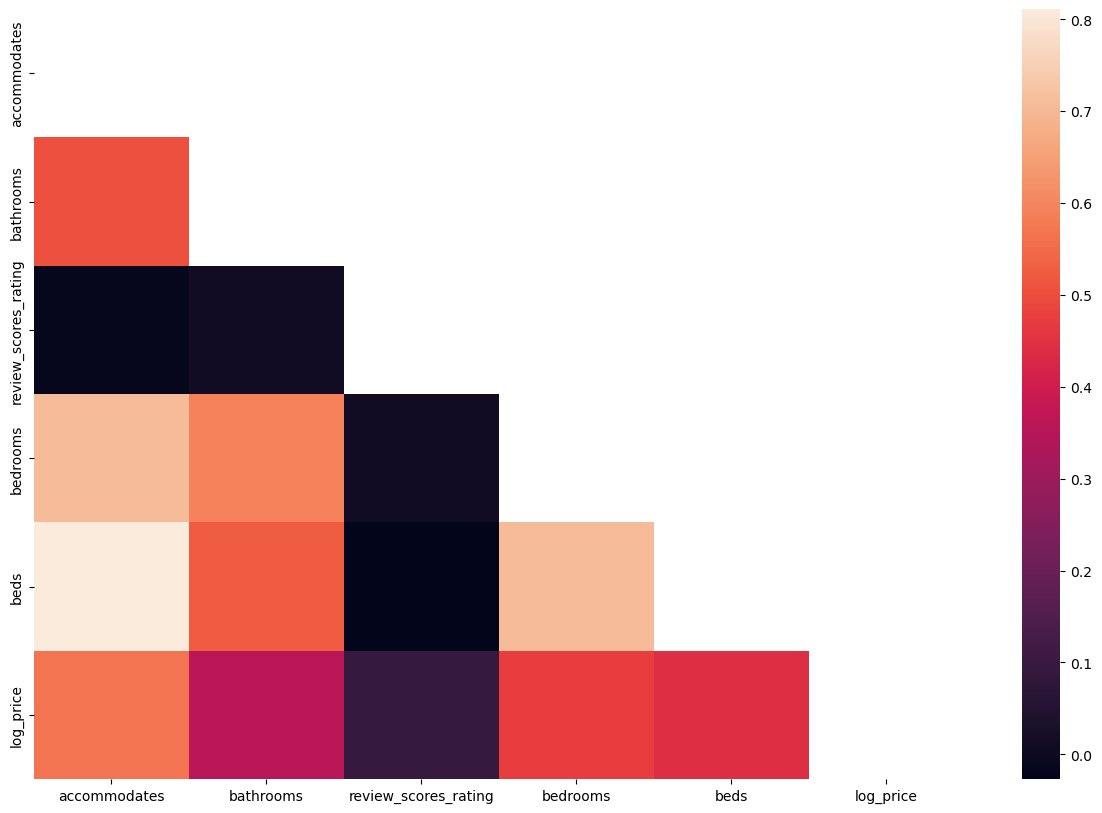

In [76]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df[num].corr(), dtype=bool))
sns.heatmap(round(df[num].corr(),3),annot = True,mask = mask)

In [182]:
df_copy = df.copy()

In [184]:
df_copy.drop('beds',axis=1,inplace = True)

In [202]:
num_c = []
cat_c = []
for i in df_copy.columns:
    if df_copy[i].dtype != 'object':
        num_c.append(i)
    else:
        cat_c.append(i)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

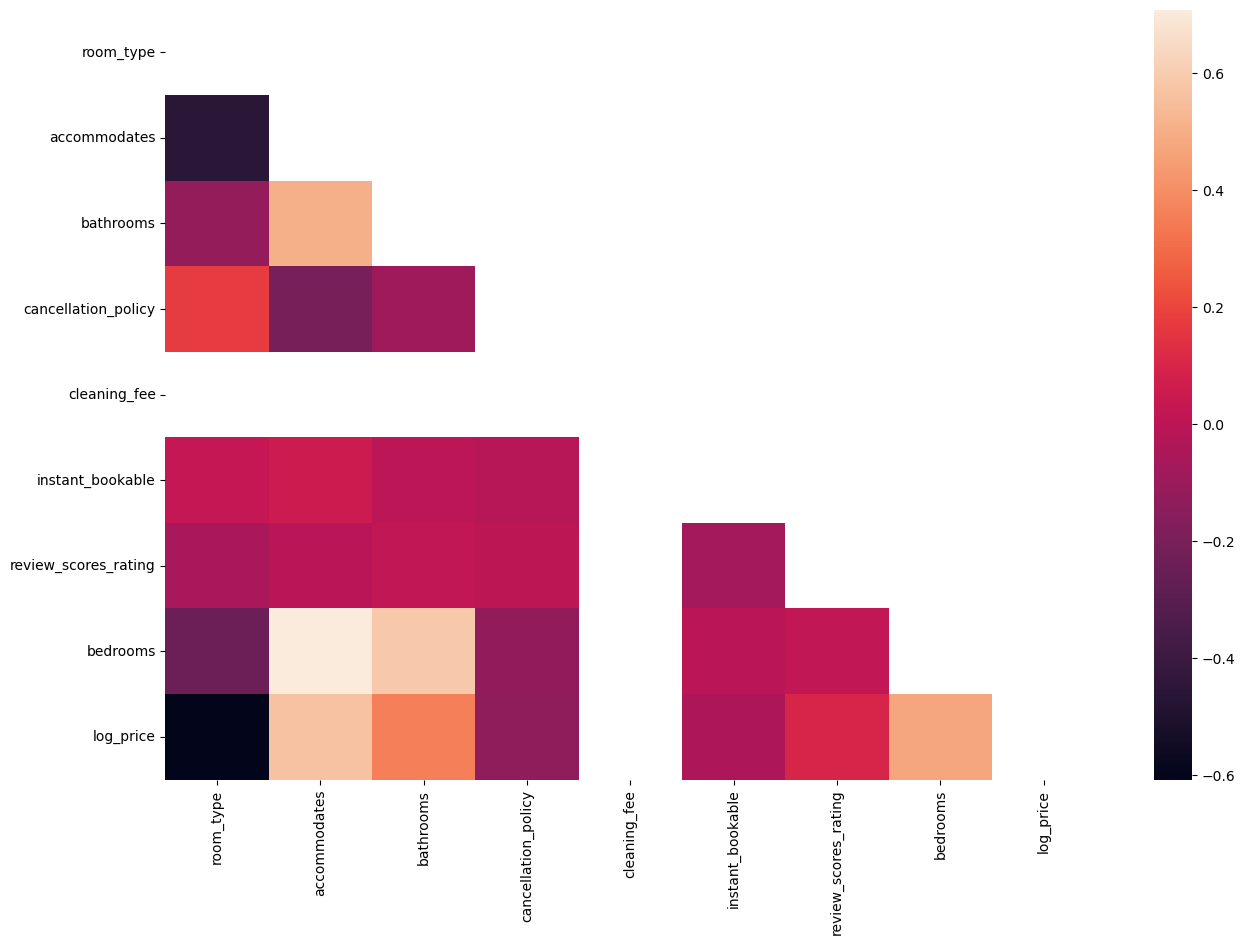

In [204]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df_copy.corr(), dtype=bool))
sns.heatmap(round(df_copy.corr(),3),annot = True,mask = mask)

In [194]:
df_copy.corr()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,log_price
room_type,1.000000,-0.458179,-0.116156,0.173081,NaN,0.027733,-0.057476,-0.242911,-0.607111
accommodates,-0.458179,1.000000,0.505814,-0.206676,NaN,0.053104,-0.006741,0.709285,0.567576
bathrooms,-0.116156,0.505814,1.000000,-0.086576,NaN,0.001557,0.019361,0.590110,0.355470
cancellation_policy,0.173081,-0.206676,-0.086576,1.000000,NaN,-0.013496,0.006216,-0.126129,-0.129282
cleaning_fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,0.027733,0.053104,0.001557,-0.013496,NaN,1.000000,-0.070093,-0.003484,-0.044271
review_scores_rating,-0.057476,-0.006741,0.019361,0.006216,NaN,-0.070093,1.000000,0.017941,0.102459
bedrooms,-0.242911,0.709285,0.590110,-0.126129,NaN,-0.003484,0.017941,1.000000,0.473019
log_price,-0.607111,0.567576,0.355470,-0.129282,NaN,-0.044271,0.102459,0.473019,1.000000


In [78]:
df[num].corr()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
accommodates,1.000000,0.505645,-0.017093,0.709275,0.810798,0.567580
bathrooms,0.505645,1.000000,0.010527,0.589935,0.525598,0.355425
review_scores_rating,-0.017093,0.010527,1.000000,0.011134,-0.027330,0.091219
bedrooms,0.709275,0.589935,0.011134,1.000000,0.709415,0.473214
beds,0.810798,0.525598,-0.027330,0.709415,1.000000,0.442153
log_price,0.567580,0.355425,0.091219,0.473214,0.442153,1.000000


In [80]:
df['cleaning_fee'].replace(to_replace ='False',value = 0, inplace = True)

In [82]:
df['cleaning_fee'] = df['cleaning_fee'].astype(str)
df['cleaning_fee'].replace(to_replace=['False', 'True'], value=[1, 1], inplace=True)

In [84]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,1,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1,t,NaN,0.0,2.0,5.273000


In [86]:
df['instant_bookable'] = df['instant_bookable'].astype(str)
df['instant_bookable'].replace(to_replace=['f', 't'], value=[1, 2], inplace=True)

In [88]:
df['cancellation_policy'] = df['cancellation_policy'].astype(str)
df['cancellation_policy'].replace(to_replace=['strict', 'moderate','flexible'], value=[1, 2, 3], inplace=True)

In [90]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,1,1,1,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,1,1,2,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,2,1,2,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,3,1,1,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,2,1,2,40.0,0.0,1.0,4.744932


In [92]:
df['room_type'] = df['room_type'].astype(str)
df['room_type'].replace(to_replace=['Entire home/apt', 'Private room','Shared room'], value=[1, 2, 3], inplace=True)

In [214]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,1.0,3.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,5.010635
1,1.0,7.0,1.0,1.0,1.0,2.0,93.0,3.0,3.0,5.129899
2,1.0,5.0,1.0,2.0,1.0,2.0,92.0,1.0,3.0,4.976734
3,1.0,4.0,1.0,3.0,1.0,1.0,89.8,2.0,2.0,6.620073
4,1.0,2.0,1.0,2.0,1.0,2.0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,2.0,1.0,1.0,3.0,1.0,1.0,97.6,1.0,1.0,4.605170
74107,1.0,4.0,2.0,2.0,1.0,1.0,93.0,2.0,4.0,5.043425
74108,1.0,5.0,1.0,2.0,1.0,2.0,94.0,2.0,2.0,5.220356
74109,1.0,2.0,1.0,1.0,1.0,2.0,96.6,0.0,2.0,5.273000


### Null Values Treatment

##### Knn Imputer

In [96]:
df.isnull().sum()

room_type                   0
accommodates                3
bathrooms                 203
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [98]:
from sklearn.impute import KNNImputer

In [100]:
imputer = KNNImputer(n_neighbors = 5)
imputed_df = imputer.fit_transform(df)

In [104]:
imputed_df

array([[1.        , 3.        , 1.        , ..., 1.        , 1.        ,
        5.01063529],
       [1.        , 7.        , 1.        , ..., 3.        , 3.        ,
        5.12989872],
       [1.        , 5.        , 1.        , ..., 1.        , 3.        ,
        4.97673374],
       ...,
       [1.        , 5.        , 1.        , ..., 2.        , 2.        ,
        5.22035583],
       [1.        , 2.        , 1.        , ..., 0.        , 2.        ,
        5.27299956],
       [1.        , 4.        , 1.        , ..., 1.        , 2.        ,
        4.85203026]])

In [106]:
df = pd.DataFrame(imputed_df,columns = df.columns)

In [216]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,1.0,3.0,1.0,1.0,1.0,1.0,100.0,1.0,1.0,5.010635
1,1.0,7.0,1.0,1.0,1.0,2.0,93.0,3.0,3.0,5.129899
2,1.0,5.0,1.0,2.0,1.0,2.0,92.0,1.0,3.0,4.976734
3,1.0,4.0,1.0,3.0,1.0,1.0,89.8,2.0,2.0,6.620073
4,1.0,2.0,1.0,2.0,1.0,2.0,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,2.0,1.0,1.0,3.0,1.0,1.0,97.6,1.0,1.0,4.605170
74107,1.0,4.0,2.0,2.0,1.0,1.0,93.0,2.0,4.0,5.043425
74108,1.0,5.0,1.0,2.0,1.0,2.0,94.0,2.0,2.0,5.220356
74109,1.0,2.0,1.0,1.0,1.0,2.0,96.6,0.0,2.0,5.273000


### Model Building

In [111]:
X = df.drop('log_price',axis = 1)
y = df['log_price']

In [115]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 74111, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [125]:
X_train.shape

(51877, 9)

In [127]:
X_test.shape

(22234, 9)

In [133]:
y_train.shape

(51877,)

In [135]:
y_test.shape

(22234,)

In [149]:
LiR_model = LinearRegression()

In [151]:
LiR_model

LinearRegression()

In [153]:
LiR_model.fit(X_train,y_train)

LinearRegression()

In [155]:
LiR_model.coef_

array([-6.02694507e-01,  7.91425478e-02,  1.51926197e-01,  1.35312851e-02,
        6.24500451e-17, -5.30083177e-02,  6.80770136e-03,  1.47411957e-01,
       -4.57205048e-02])

In [157]:
LiR_model.intercept_

4.523619329179046

In [175]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LiR_model.coef_[idx]))

The coefficient for room_type is -0.6026945067264248
The coefficient for accommodates is 0.07914254779156052
The coefficient for bathrooms is 0.15192619737415566
The coefficient for cancellation_policy is 0.013531285135808306
The coefficient for cleaning_fee is 6.245004513516506e-17
The coefficient for instant_bookable is -0.05300831772375138
The coefficient for review_scores_rating is 0.0068077013629734675
The coefficient for bedrooms is 0.14741195741848337
The coefficient for beds is -0.04572050480139599


##### Model Evaluation

In [178]:
LiR_model.score(X_train,y_train)

0.5155984100398125

In [180]:
LiR_model.score(X_test,y_test)

0.5131207467304116

In [208]:
Xc = df_copy.drop('log_price',axis = 1)
yc = df_copy['log_price']

Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size = 0.3,random_state = 1)

LiR_model.fit(Xc_train,yc_train)

print(LiR_model.score(Xc_train,yc_train))
print(LiR_model.score(Xc_test,yc_test))

0.5136893781910803
0.5101576065110666


In [212]:
LiR_model.fit(X_train,y_train)
y_train_pred = LiR_model.predict(X_train)
y_train_pred

array([4.44420981, 4.35772664, 5.00118324, ..., 5.59834606, 5.46027348,
       5.24286872])

In [218]:
y_test_pred = LiR_model.predict(X_test)
y_test_pred

array([5.41944546, 4.3708097 , 4.89436166, ..., 5.20163593, 4.29782651,
       4.88562055])

#### Model Regularization

##### Ridge

In [258]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [260]:
from sklearn.metrics import r2_score

In [238]:
print("The regression model TRAIN SCORE is {}".format(LiR_model.score(X_train,y_train)))
print("The regression model TEST SCORE is {}".format(LiR_model.score(X_test,y_test)))

The regression model TRAIN SCORE is 0.5155984100398125
The regression model TEST SCORE is 0.5131207467304116


In [264]:
R1 = Ridge(alpha = 0.3)
R1.fit(X_train,y_train)

Ridge(alpha=0.3)

In [266]:
print("The regression model TRAIN SCORE is {}".format(R1.score(X_train,y_train)))
print("The regression model TEST SCORE is {}".format(R1.score(X_test,y_test)))

The regression model TRAIN SCORE is 0.5155984099251293
The regression model TEST SCORE is 0.5131208686813036


In [274]:
R2 = Ridge(alpha = 8) 

In [276]:
R2.fit(X_train,y_train)

Ridge(alpha=8)

In [278]:
print("The regression model TRAIN SCORE is {}".format(R2.score(X_train,y_train)))
print("The regression model TEST SCORE is {}".format(R2.score(X_test,y_test)))

The regression model TRAIN SCORE is 0.515598328598315
The regression model TEST SCORE is 0.513123916699509


In [304]:
L1 = Lasso(alpha=0.00000000005)
L1.fit(X_train,y_train)

Lasso(alpha=5e-11)

In [306]:
print("The regression model TRAIN SCORE is {}".format(L1.score(X_train,y_train)))
print("The regression model TEST SCORE is {}".format(L1.score(X_test,y_test)))

The regression model TRAIN SCORE is 0.5155984100398123
The regression model TEST SCORE is 0.5131207467269605


#### Non-Linear Model

In [309]:
from sklearn.preprocessing import PolynomialFeatures

In [311]:
poly = PolynomialFeatures(degree = 2,interaction_only = True)

In [313]:
X_poly = poly.fit_transform(X)

In [315]:
Xp_train,Xp_test,yp_train,yp_test = train_test_split(X_poly,y,test_size = 0.3,random_state = 1)

In [321]:
Xp_train.shape

(51877, 46)

In [329]:
LiR_model.fit(Xp_train,yp_train)

LinearRegression()

In [331]:
LiR_model.coef_

array([-5.14624683e-16, -2.17733868e-01, -2.72318203e-02,  1.18091703e-01,
       -2.71416240e-02,  8.71525074e-15, -2.11477410e-02,  1.24898489e-03,
        1.69880638e-01,  8.65628640e-02,  2.51300800e-02, -2.43120106e-01,
        5.17099332e-02, -2.17733868e-01,  9.62732178e-04,  1.07443501e-03,
       -9.64631968e-02, -1.58236431e-02, -8.35714728e-03,  1.30680958e-02,
       -2.72318203e-02,  1.00092199e-02,  1.01980501e-03, -2.98288312e-03,
       -8.20885784e-03,  1.41720319e-02,  1.18091703e-01,  1.22999898e-02,
        2.99299870e-03, -2.76805257e-03,  6.58736570e-03, -2.71416240e-02,
        2.69598061e-03, -4.24934335e-04, -1.27309237e-02, -8.14699939e-03,
       -2.11477410e-02,  1.24898489e-03,  1.69880638e-01,  8.65628640e-02,
       -2.13920018e-04, -9.50563684e-03, -1.65917448e-02, -9.95197869e-04,
       -1.22267873e-03,  5.95992508e-03])

In [337]:
print("The regression model TRAIN SCORE is {}".format(LiR_model.score(Xp_train,yp_train)))
print("The regression model TEST SCORE is {}".format(LiR_model.score(Xp_test,yp_test)))

The regression model TRAIN SCORE is 0.532091806090623
The regression model TEST SCORE is 0.5276157533245465


In [341]:
R = Ridge(alpha = 0.003)
R.fit(Xp_train,yp_train)
print("The regression model TRAIN SCORE is {}".format(R.score(Xp_train,yp_train)))
print("The regression model TEST SCORE is {}".format(R.score(Xp_test,yp_test)))

The regression model TRAIN SCORE is 0.5320918060901443
The regression model TEST SCORE is 0.5276157487826456


In [349]:
L = Lasso(alpha = 0.0001)
L.fit(Xp_train,yp_train)
print("The regression model TRAIN SCORE is {}".format(L.score(Xp_train,yp_train)))
print("The regression model TEST SCORE is {}".format(L.score(Xp_test,yp_test)))

The regression model TRAIN SCORE is 0.5319917189830778
The regression model TEST SCORE is 0.5273831441224143


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.184e+03, tolerance: 2.672e+00
  model = cd_fast.enet_coordinate_descent(
